## ROI interactive segmentation

In [9]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_interactions import image_segmenter 
import ipywidgets as widgets
import os
import pandas as pd

In [ ]:
path = '../../data/imrh_114a/slices/lammy0_slice120.png'
slice_2d = mpimg.imread()

N_classes = 4
class_selector = widgets.Dropdown(options=list(range(1, N_classes + 1)), description="class")


def update(change):
    multi_class_segmenter.current_class = class_selector.value
    multi_class_segmenter.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
multi_class_segmenter = image_segmenter(slice_2d, nclasses=4, mask_alpha=0.65)
display(widgets.HBox([erasing_button, class_selector]))
display(multi_class_segmenter)

## SNR computation 

In [4]:

def get_rgb_img(path):
    img = mpimg.imread(path)
    # get RGB channel ref = 3
    rgb_img = img[:, :, :3] 
    rgb_img = rgb_img / np.amax(rgb_img)
    return(rgb_img)

def asnr_128(img, mask):
    # calculate std and mean
    img_p = img[mask==1] # parenchyma
    img_a = img[mask==2] # aorta
    img_t = img[mask==3] # trachea
    img_b = img[mask==4] # background
        
    # calculate SNR
    p_snr = np.mean(img_p) / np.std(img_b)
    a_snr = np.mean(img_a) / np.std(img_b)
    t_snr = np.mean(img_t) / np.std(img_b)
    
    return p_snr, a_snr, t_snr

def asnr_114(img, mask):
    # calculate std and mean
    img_p = img[mask==1] # parenchyma
    img_a = img[mask==3] # aorta
    img_t = img[mask==2] # trachea
    img_b = img[mask==4] # background
        
    # calculate SNR
    p_snr = np.mean(img_p) / np.std(img_b)
    a_snr = np.mean(img_a) / np.std(img_b)
    t_snr = np.mean(img_t) / np.std(img_b)
    
    return p_snr, a_snr, t_snr

In [15]:
slice_path = '../../data/imrh_114a/slices'
files = os.listdir(slice_path)
imrh_114a_mask = np.load('masks/imrh_114a/imrh_114a.npy')
snr_data_114a = []

for file in files:
    if file.endswith("slice120.png"):
        img_path = os.path.join(slice_path,file)
        rgb_img = get_rgb_img(img_path)
        lammy_value = float(file.split('_')[0].replace('lammy', ''))
        
        p_snr, a_snr, t_snr = asnr_114(rgb_img,imrh_114a_mask)
        snr_data_114a.append({'lammy': lammy_value, 
                             'p_snr': p_snr, 
                             'a_snr': a_snr, 
                             't_snr': t_snr})


snr_data_114a = pd.DataFrame(snr_data_114a)
snr_data_114a


,lammy,p_snr,a_snr,t_snr
0,0.100,0.764631,2.900054,0.952391
1,0.050,0.717056,2.808957,0.779428
2,0.075,0.743317,2.864010,0.874278
3,0.000,0.688453,2.655448,0.648218
4,0.010,0.680825,2.692559,0.615356
5,0.025,0.689331,2.738076,0.662087


In [16]:
slice_path = '../../data/imrh_128b/slices'
files = os.listdir(slice_path)
imrh_128_mask = np.load('masks/imrh_128b/imrh_128b.npy')
snr_data_128b = []

for file in files:
    if file.endswith("slice120.png"):
        img_path = os.path.join(slice_path,file)
        rgb_img = get_rgb_img(img_path)
        lammy_value = float(file.split('_')[0].replace('lammy', ''))
        
        p_snr, a_snr, t_snr = asnr_128(rgb_img,imrh_128_mask)
        snr_data_128b.append({'lammy': lammy_value, 
                             'p_snr': p_snr, 
                             'a_snr': a_snr, 
                             't_snr': t_snr})


snr_data_128b = pd.DataFrame(snr_data_128b)
snr_data_128b

,lammy,p_snr,a_snr,t_snr
0,0.100,6.281056,19.119202,14.140026
1,0.050,6.551438,20.034767,15.031523
2,0.075,6.383472,19.473192,14.491071
3,0.000,6.412090,18.767860,14.965020
4,0.010,6.897079,20.759212,16.106407
5,0.025,6.779669,20.710459,15.745169


## Visualise results 

In [23]:
snr_data_128b

,lammy,p_snr,a_snr,t_snr,scaled_a_snr,scaled_p_snr,scaled_t_snr
0,0.100,6.281056,19.119202,14.140026,0.176434,0.000000,0.000000
1,0.050,6.551438,20.034767,15.031523,0.636205,0.438914,0.453369
2,0.075,6.383472,19.473192,14.491071,0.354198,0.166253,0.178523
3,0.000,6.412090,18.767860,14.965020,0.000000,0.212708,0.419549
4,0.010,6.897079,20.759212,16.106407,1.000000,1.000000,1.000000
5,0.025,6.779669,20.710459,15.745169,0.975517,0.809406,0.816293


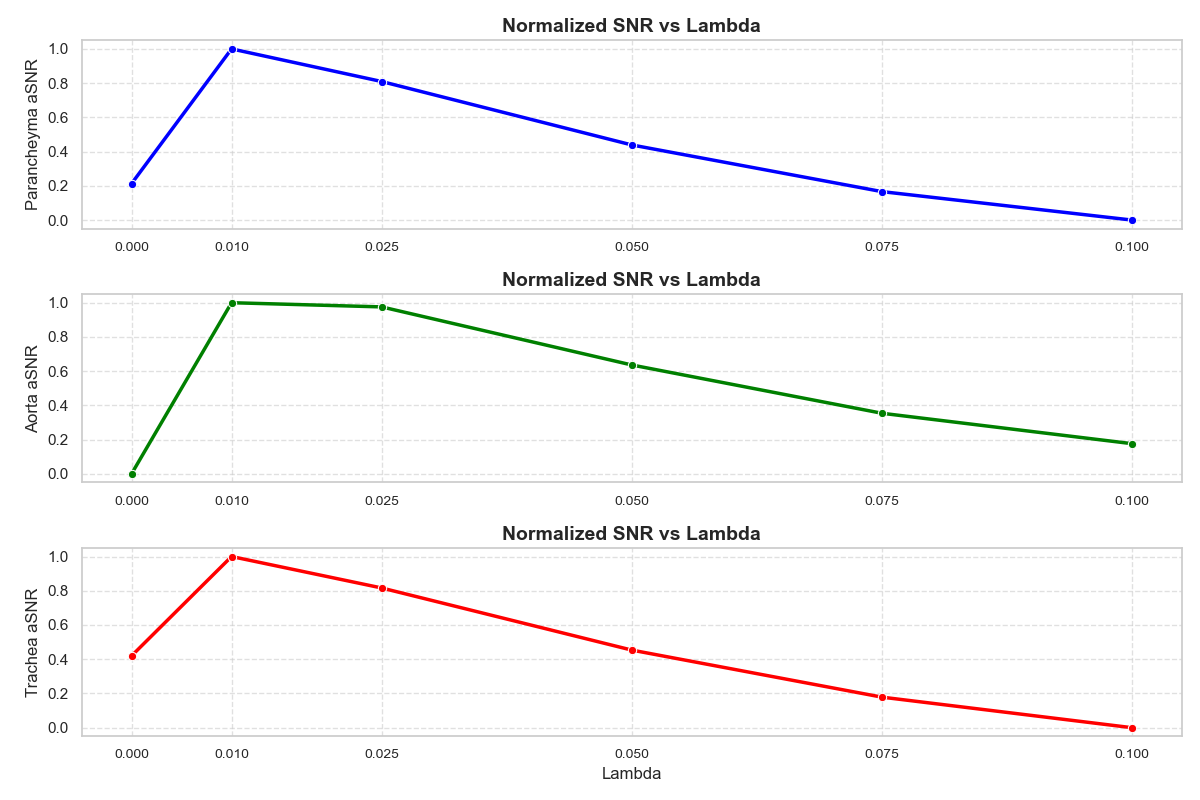

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
snr_data_128b['scaled_a_snr'] = scaler.fit_transform(snr_data_128b[['a_snr']])

scaler = MinMaxScaler()
snr_data_128b[['scaled_p_snr', 'scaled_a_snr', 'scaled_t_snr']] = scaler.fit_transform(snr_data_128b[['p_snr', 'a_snr', 't_snr']])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.lineplot(x='lammy', y='scaled_p_snr', data=snr_data_128b, marker='o', color="blue", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Parancheyma aSNR', fontsize=12)
plt.xticks(ticks=snr_data_128b['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_128b['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 2)
sns.lineplot(x='lammy', y='scaled_a_snr', data=snr_data_128b, marker='o', color="green", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Aorta aSNR', fontsize=12)
plt.xticks(ticks=snr_data_128b['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_128b['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 3)
sns.lineplot(x='lammy', y='scaled_t_snr', data=snr_data_128b, marker='o', color="red", lw=2.5)
plt.title('Normalized SNR vs Lambda', fontsize=14, fontweight='bold')
plt.xlabel('Lambda', fontsize=12)
plt.ylabel('Trachea aSNR', fontsize=12)
plt.xticks(ticks=snr_data_128b['lammy'], labels=[f'{lammy:.3f}' for lammy in snr_data_128b['lammy']], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
